In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib.ticker import AutoLocator, AutoMinorLocator, LogLocator
from matplotlib.colors import Normalize
import glob
from scipy.interpolate import griddata
from pathlib import Path
import h5py
import sys

# Where am I running?
try:
    # Normal script
    here = Path(__file__).resolve().parent
except NameError:
    # Notebook / REPL
    here = Path.cwd()

phys_const_path = (here / '..' / 'phys_const').resolve()
sys.path.append(str(phys_const_path))

nsm_plots_path = (here / '..' / 'nsm_plots').resolve()
sys.path.append(str(nsm_plots_path))

nsm_plots_postproc = (here / '..' / 'nsm_instabilities').resolve()
sys.path.append(str(nsm_plots_postproc))

import phys_const as pc
import plot_functions as pf
import functions_angular_crossings as fac

In [5]:
with h5py.File(f"cell_32-48-15_dom_1-1-1_km_ncell_1-1-1_energy_spectra_time_evolution.h5", "r") as hf:
    all_n00_Re_split_energy_bins = hf["all_n00_Re_split_energy_bins"][:]
    all_n00_Rebar_split_energy_bins = hf["all_n00_Rebar_split_energy_bins"][:]
    all_n11_Re_split_energy_bins = hf["all_n11_Re_split_energy_bins"][:]
    all_n11_Rebar_split_energy_bins = hf["all_n11_Rebar_split_energy_bins"][:]
    all_n22_Re_split_energy_bins = hf["all_n22_Re_split_energy_bins"][:]
    all_n22_Rebar_split_energy_bins = hf["all_n22_Rebar_split_energy_bins"][:]
    tiempo_s = hf["tiempo_s"][:]
    energybinsMeV = hf["energybinsMeV"][:]

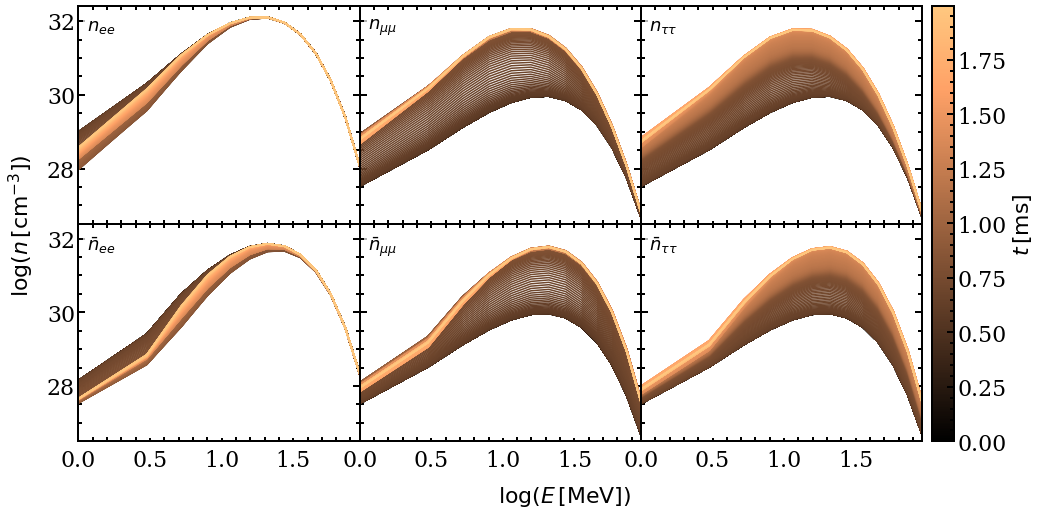

In [8]:
def plot_colored_lines_grid(x, y_list, time_s, titles, suptitle, filename, ylowerlimit=None, yupperlimit=None):
    fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharex=True, sharey=True, gridspec_kw=dict(hspace=0.0, wspace=0.0))
    axs = axs.flatten()

    norm = Normalize(time_s.min(), time_s.max())
    cmap = plt.cm.copper

    for i, y in enumerate(y_list):
        ax = axs[i]
        for j in range(y.shape[0]):
            color = cmap(norm(time_s[j]))
            ax.plot(x, y[j, :], color=color)

        # Place the title inside the plot, top left corner
        ax.text(0.03, 0.95, titles[i], transform=ax.transAxes, fontsize=18,
            verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(ylowerlimit, yupperlimit)
        ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
        # if i % 3 == 0:
        #     ax.set_ylabel(r'$\log(n\, [\mathrm{cm}^{-3}])$')
        # if i >= 3:
        #     ax.set_xlabel(r'$\log(E\, [\mathrm{MeV}])$')

    fig.text(0.5, 0.02, r'$\log(E\, [\mathrm{MeV}])$', ha='center', fontsize=22)
    fig.text(0.07, 0.5, r'$\log(n\, [\mathrm{cm}^{-3}])$', va='center', rotation='vertical', fontsize=22)

    # Shared colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axs, location='right', shrink=1.0, pad=0.01)
    cbar.set_label(r'$t \, [\mathrm{ms}]$', fontsize=22)
    cbar.ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Super title
    fig.suptitle(suptitle, fontsize=22)

    # Save and show
    if filename:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close(fig)

plot_colored_lines_grid(
    x = np.log10(energybinsMeV),
    y_list = [
        np.log10(all_n00_Re_split_energy_bins),
        np.log10(all_n11_Re_split_energy_bins),
        np.log10(all_n22_Re_split_energy_bins),
        np.log10(all_n00_Rebar_split_energy_bins),
        np.log10(all_n11_Rebar_split_energy_bins),
        np.log10(all_n22_Rebar_split_energy_bins)
    ],
    time_s = tiempo_s / 1e-3,
    titles = [
        r'$n_{ee}$', r'$n_{\mu\mu}$', r'$n_{\tau\tau}$',
         r'$\bar{n}_{ee}$', r'$\bar{n}_{\mu\mu}$', r'$\bar{n}_{\tau\tau}$'
    ],
    
    suptitle = '',
    filename = f"plots/n_CFI_E_spectrum.pdf",
    ylowerlimit = 26.5,
    yupperlimit = 32.4
)